# ARIMA Model for Time Series Forecasting

### 1. Introduction to Time Series Forecasting 

A Time Series is defined as a series of data points recorded at different time intervals. The time order can be daily, monthly, or even yearly.

Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

We have discussed various aspects of Time Series Forecasting in the previous notebook - Complete Guide to Time Series Analysis in Python.

Forecasting is the step where we want to predict the future values the series is going to take. Forecasting a time series is often of tremendous commercial value.

Forecasting a time series can be broadly divided into two types.
If we use only the previous values of the time series to predict its future values, it is called Univariate Time Series Forecasting.

If we use predictors other than the series (like exogenous variables) to forecast it is called Multi Variate Time Series Forecasting.

This notebook focuses on a particular type of forecasting method called ARIMA modeling.

### 2. Introduction to ARIMA Models 

ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.
ARIMA Models are specified by three order parameters: (p, d, q),

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.


#### Types of ARIMA Model

ARIMA : Non-seasonal Autoregressive Integrated Moving Averages

SARIMA : Seasonal ARIMA

SARIMAX : Seasonal ARIMA with exogenous variables


If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

### 3. The meaning of p, d and q in ARIMA model 


#### 3.1 The meaning of p

p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors.


#### 3.2 The meaning of d

The term Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent of each other. So we need to make the time series stationary.
The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.
The value of d, therefore, is the minimum number of differencing needed to make the series stationary. If the time series is already stationary, then d = 0.


#### 3.3 The meaning of q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

### First Stop: How to find the order of differencing (d) in ARIMA model 

As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.

So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.

Now, we will explain these concepts with the help of an example as follows:-


First, I will check if the series is stationary using the Augmented Dickey Fuller test (ADF Test), from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

# Lets get our hands dirty!!!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "./" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./dataset.txt
./TimeSeriesAnalysis with ARIMA.ipynb
./.ipynb_checkpoints/TimeSeriesAnalysis with ARIMA-checkpoint.ipynb


In [2]:
#import the data

path = './dataset.txt'

df = pd.read_csv(path)

df.head()
df.tail()

,date,value
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


In [3]:
df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


In [4]:
time_series = pd.Series(df.value.values, pd.date_range(min(df.date), max(df.date), freq='MS'))

time_series

1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Freq: MS, Length: 204, dtype: float64

In [5]:
plt.plot(time_series)
plt.show()

NameError: name 'plt' is not defined

NameError: name 'plt' is not defined

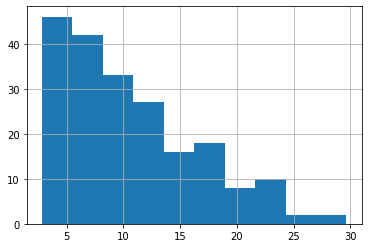

In [6]:
time_series.hist()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

#result = adfuller(df.value.dropna())
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])

#Perform Dickey-Fuller test to check if the series is stationary
def test_stationary_with_adf(series):
    print('Results of A-Dickey-Fuller Test:')
    test_series = adfuller(series, autolag='AIC')
    pvaloutput = pd.Series(test_series[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(pvaloutput)

In [10]:
test_stationary_with_adf(time_series)

Results of A-Dickey-Fuller Test:
Test Statistic                   3.145186
p-value                          1.000000
#Lags Used                      15.000000
Number of Observations Used    188.000000
dtype: float64


# About ADF Statics

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not.

Augmented Dickey-Fuller test:

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
    
    
Since p-value(1.00) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

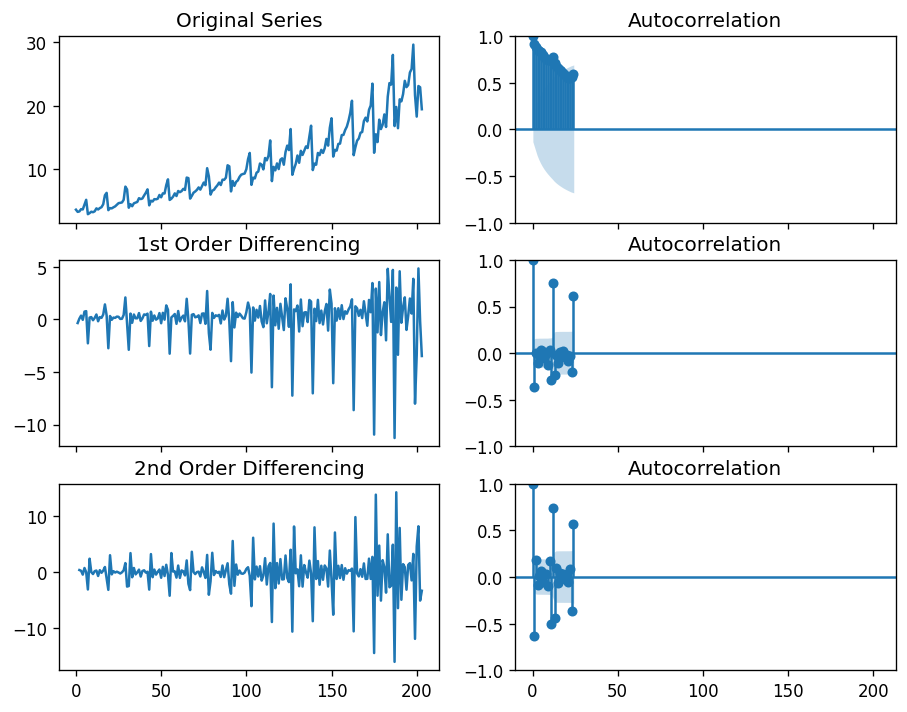

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

For the above data, we can see that the time series reaches stationarity with two orders of differencing.

### 4. How to find the order of the AR term (p) 

The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.
Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.
𝑌𝑡=𝛼0+𝛼1𝑌𝑡−1+𝛼2𝑌𝑡−2+𝛼3𝑌𝑡−3
 
That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient  𝛼3  of Y_t-3 in the above equation.
Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

In [12]:
import warnings
warnings.filterwarnings("ignore")

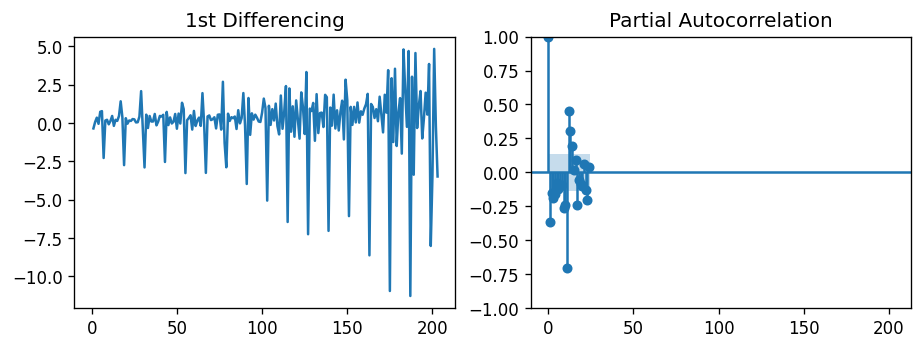

In [13]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the value of p as 1.

### 5. How to find the order of the MA term (q) 

Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Let’s see the autocorrelation plot of the differenced series.

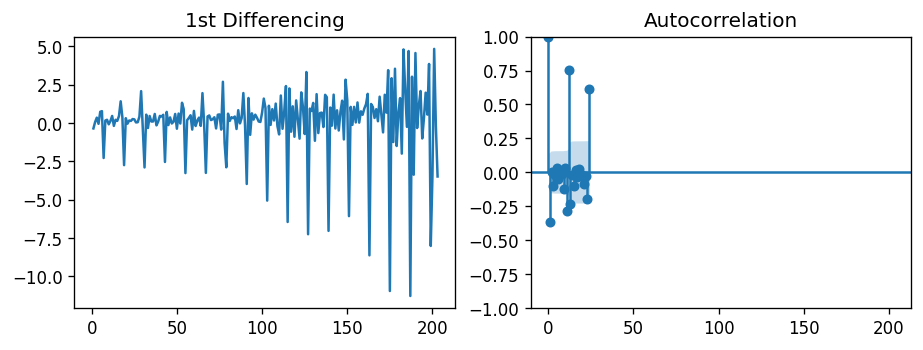

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

We can see that couple of lags are well above the significance line. So, we will fix q as 2. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

# Seasonality, Observed, and Residuals

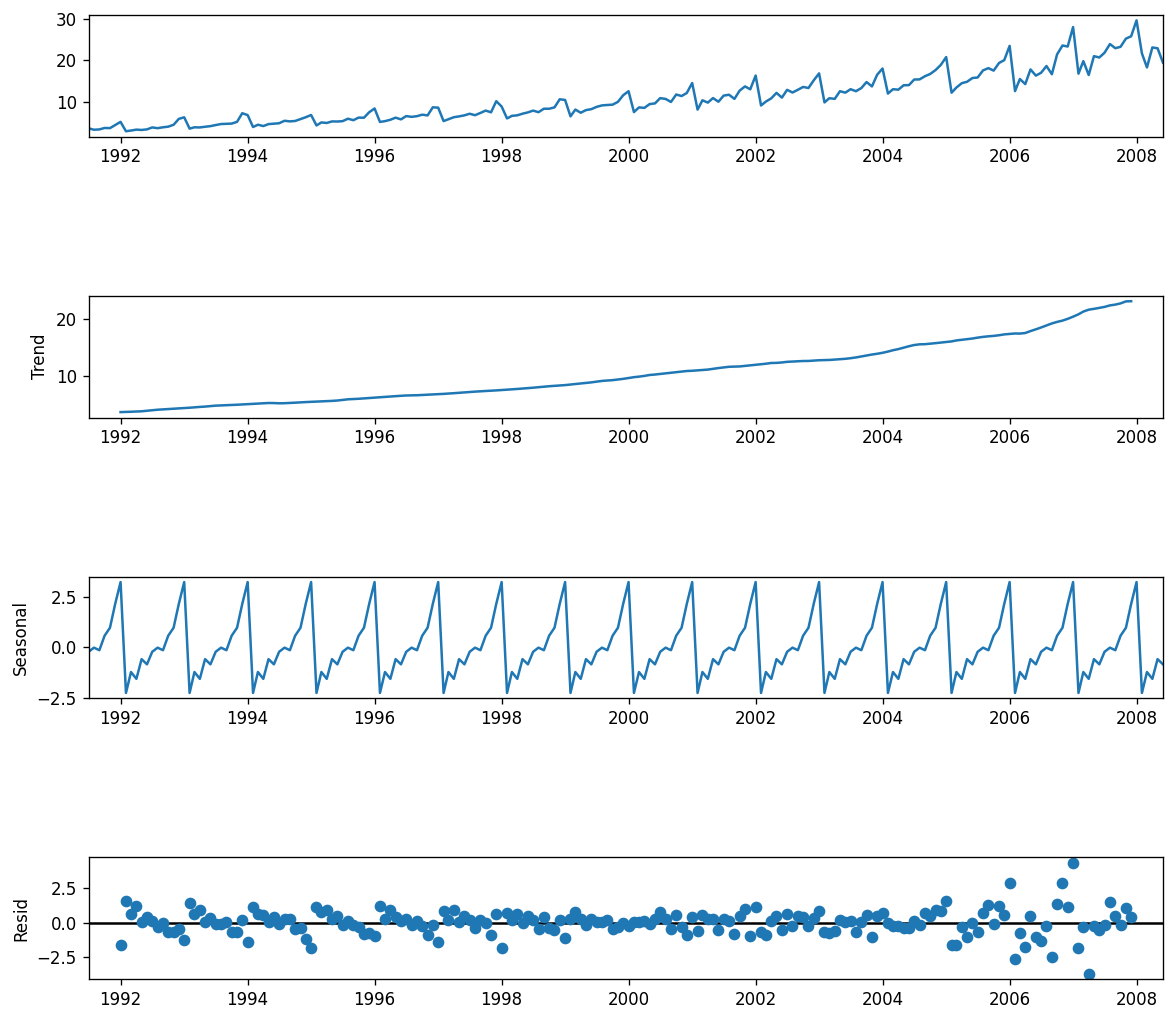

In [15]:
import statsmodels.api as sm

#Given a series of data, let us separate observed trend and seasonal patterns; try to minimize error MSE around zero-mean
def decompose_series_1(series):
    #Decompose the series into monthly segments
    decomposition = sm.tsa.seasonal_decompose(series)
    #Plot it
    fig = decomposition.plot()
    fig.set_size_inches(10, 10)

# Decompose and plot
decompose_series_1(time_series)

In [16]:
pip install rpy2

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [17]:
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.vectors import IntVector,FloatVector

def decompose_series_2(series, frequency, s_window = 'periodic', log = False,  **kwargs):
    '''
    Decompose a time series into seasonal, trend and irregular components using loess, 
    acronym STL.
    https://www.rdocumentation.org/packages/stats/versions/3.4.3/topics/stl

    params:
        series: a time series

        frequency: the number of observations per “cycle” 
                   (normally a year, but sometimes a week, a day or an hour)
                   https://robjhyndman.com/hyndsight/seasonal-periods/

        s_window: either the character string "periodic" or the span 
                 (in lags) of the loess window for seasonal extraction, 
                 which should be odd and at least 7, according to Cleveland 
                 et al.

        log:    boolean.  take log of series

        **kwargs:  See other params for stl at 
           https://www.rdocumentation.org/packages/stats/versions/3.4.3/topics/stl
    '''

    df = pd.DataFrame()
    df['date'] = series.index

    if log:
        series = series.pipe(np.log)

    s = [x for x in series.values]
    length = len(series)
    s = r.ts(FloatVector(series.values), frequency=frequency)
    decomposed = [x for x in r.stl(s, s_window).rx2('time.series')]
    df.index = series.index
    df['observed'] = series.values
    df['trend'] = decomposed[length:2*length]
    df['seasonal'] = decomposed[0:length]
    df['residuals'] = decomposed[2*length:3*length]

    return df

In [18]:
df_decomposed = decompose_series_2(time_series, 12, log=True)
df_decomposed.head()

,date,observed,trend,seasonal,residuals
1991-07-01,1991-07-01,1.260332,1.205785,-0.007094,0.061640
1991-08-01,1991-08-01,1.157161,1.212358,-0.003514,-0.051683
1991-09-01,1991-09-01,1.179338,1.218931,-0.008433,-0.031159
1991-10-01,1991-10-01,1.283986,1.225383,0.052245,0.006358
1991-11-01,1991-11-01,1.271408,1.231836,0.077549,-0.037977


<AxesSubplot:>

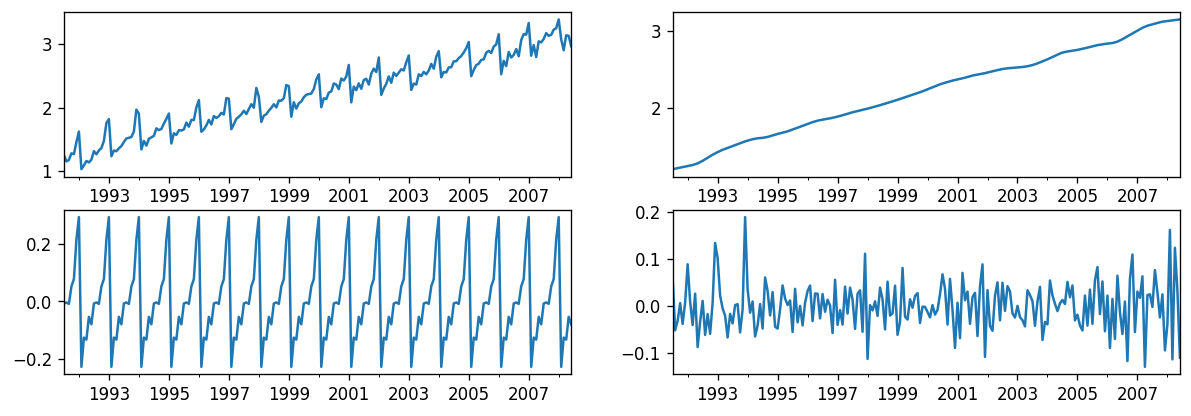

In [19]:
fig = plt.figure(figsize=(12, 4))

# Raw log plots
ax1 = fig.add_subplot(221)
df_decomposed.observed.plot(ax=ax1)
ax2 = fig.add_subplot(222)
df_decomposed.trend.plot(ax=ax2)

# Lag 1 log plots
ax3 = fig.add_subplot(223)
df_decomposed.seasonal.plot(ax=ax3)
ax4 = fig.add_subplot(224)
df_decomposed.residuals.plot(ax=ax4)

<AxesSubplot:>

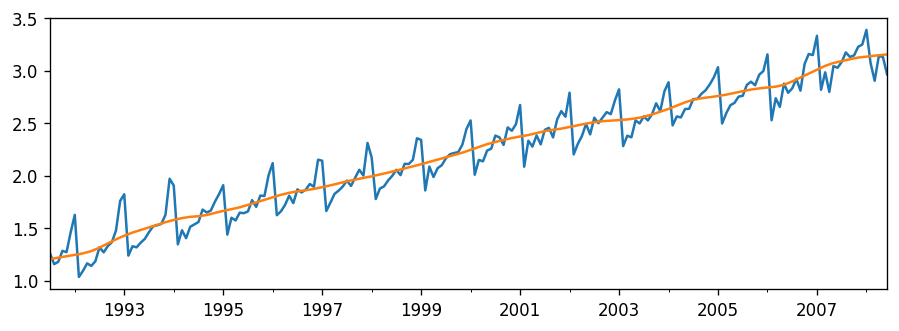

In [20]:
df_decomposed.observed.plot()
df_decomposed.trend.plot()

<AxesSubplot:>

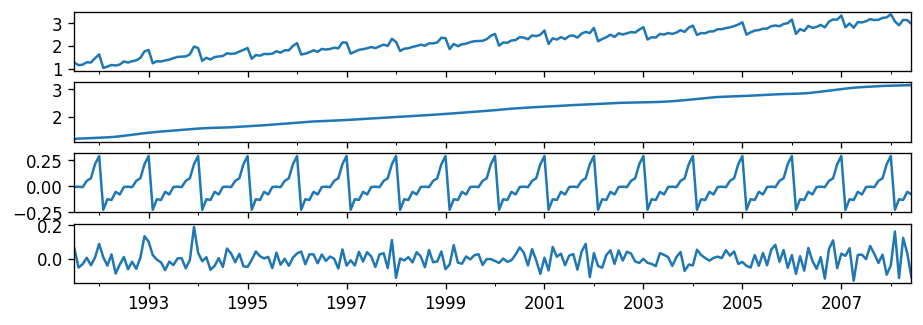

In [21]:
f, ax = plt.subplots(4, sharex=True)

df_decomposed.observed.plot(ax=ax[0])
df_decomposed.trend.plot(ax=ax[1])
df_decomposed.seasonal.plot(ax=ax[2])
df_decomposed.residuals.plot(ax=ax[3])

### 6. How to build the ARIMA Model 

Now, we have determined the values of p, d and q. We have everything needed to fit the ARIMA model. We will use the ARIMA() implementation in the statsmodels package.

In [29]:
from statsmodels.tsa.arima.model import ARIMA
(p, d, q) = (1, 1, 2)
# 1,1,2 ARIMA Model

model = ARIMA(time_series, order=(p, d, q), seasonal_order=(p, d, q, 12))
model_fit = model.fit()
print(model_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  204
Model:             ARIMA(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -258.507
Date:                          Sun, 17 Oct 2021   AIC                            531.014
Time:                                  01:58:56   BIC                            553.780
Sample:                              07-01-1991   HQIC                           540.235
                                   - 06-01-2008                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2890      0.231     -1.252      0.210      -0.741       0.163
ma.L1         -0.6273      0.255     -2.461      0.

The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

The coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

So, we will rebuild the model without the MA2 term.

In [43]:
(p, d, q) = (1, 1, 1)
# 1,1,1 ARIMA Model
model_2 = ARIMA(time_series, order=(p, d, q), seasonal_order=(p, d, q, 12))
res = model_2.fit()
print(res.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  204
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -258.560
Date:                          Sun, 17 Oct 2021   AIC                            527.119
Time:                                  02:09:19   BIC                            543.380
Sample:                              07-01-1991   HQIC                           533.706
                                   - 06-01-2008                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.052     -5.159      0.000      -0.367      -0.165
ma.L1         -0.6654      0.048    -13.854      0.

The model AIC has slightly reduced, which is good. The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

<AxesSubplot:>

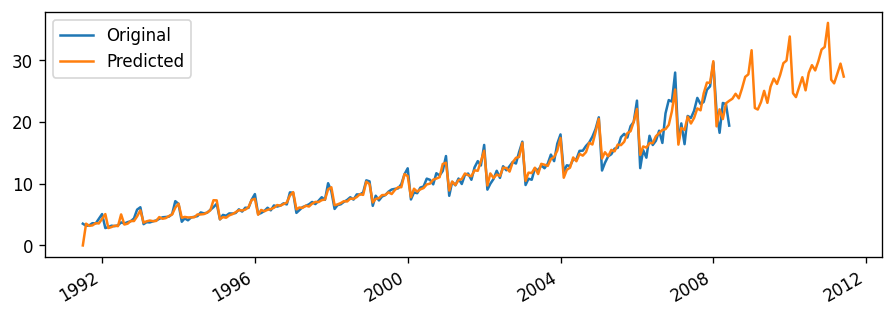

In [48]:
# Create a shell frame for future without any readings first

import datetime
from dateutil.relativedelta import *
time_series.name = "Original"

date_list = pd.date_range(start=max(time_series.index), periods=36 + 1, freq='MS')
future = pd.DataFrame(index=pd.to_datetime(date_list), columns=[time_series.name])
pred_df = pd.concat([time_series.to_frame(), future])

# Predict in the log scale
pred_df['Predicted'] = res.predict(start=0, end=len(pred_df.index) + 1)



# Plot the projections
pd.concat([time_series, pred_df['Predicted']], axis=1).plot()

In [49]:
# In the next two years what is the likely projected passenger volume?
estimates = pred_df[pred_df.index >= max(time_series.index)]['Predicted'] \
                      .to_frame('Estimated')
print(estimates)

            Estimated
2008-06-01  23.458484
2008-06-01  23.458484
2008-07-01  23.790592
2008-08-01  24.596181
2008-09-01  23.855356
2008-10-01  25.440114
2008-11-01  27.345758
2008-12-01  27.747725
2009-01-01  31.661032
2009-02-01  22.296792
2009-03-01  22.039282
2009-04-01  23.251078
2009-05-01  25.068028
2009-06-01  23.127576
2009-07-01  25.740685
2009-08-01  27.062784
2009-09-01  26.194567
2009-10-01  27.655863
2009-11-01  29.564331
2009-12-01  29.986476
2010-01-01  33.892860
2010-02-01  24.689973
2010-03-01  24.059286
2010-04-01  25.703699
2010-05-01  27.280913
2010-06-01  25.156940
2010-07-01  27.978046
2010-08-01  29.238605
2010-09-01  28.385566
2010-10-01  29.861572
2010-11-01  31.769704
2010-12-01  32.189444
2011-01-01  36.096653
2011-02-01  26.874542
2011-03-01  26.288317
2011-04-01  27.881186
2011-05-01  29.486963
2011-06-01  27.384856


<AxesSubplot:title={'center':'Estimated values for next two years'}>

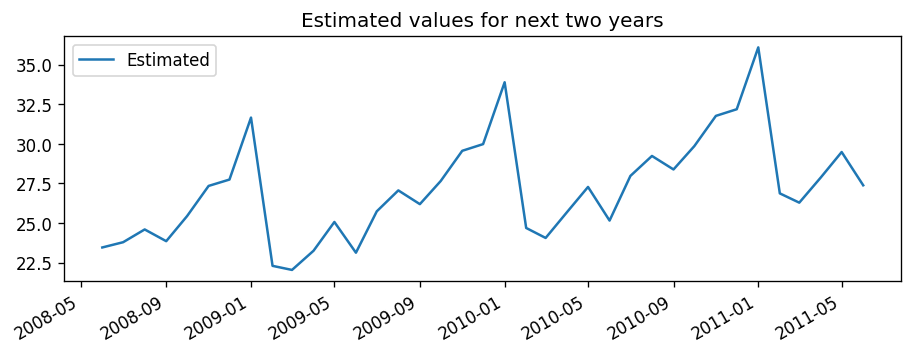

In [50]:
estimates.plot(title='Estimated values for next two years')

In [57]:
# Forecast
fc = res.forecast(36, alpha=0.05)  # 95% conf
fc

2008-07-01    23.790592
2008-08-01    24.596181
2008-09-01    23.855356
2008-10-01    25.440114
2008-11-01    27.345758
2008-12-01    27.747725
2009-01-01    31.661032
2009-02-01    22.296792
2009-03-01    22.039282
2009-04-01    23.251078
2009-05-01    25.068028
2009-06-01    23.127576
2009-07-01    25.740685
2009-08-01    27.062784
2009-09-01    26.194567
2009-10-01    27.655863
2009-11-01    29.564331
2009-12-01    29.986476
2010-01-01    33.892860
2010-02-01    24.689973
2010-03-01    24.059286
2010-04-01    25.703699
2010-05-01    27.280913
2010-06-01    25.156940
2010-07-01    27.978046
2010-08-01    29.238605
2010-09-01    28.385566
2010-10-01    29.861572
2010-11-01    31.769704
2010-12-01    32.189444
2011-01-01    36.096653
2011-02-01    26.874542
2011-03-01    26.288317
2011-04-01    27.881186
2011-05-01    29.486963
2011-06-01    27.384856
Freq: MS, Name: predicted_mean, dtype: float64

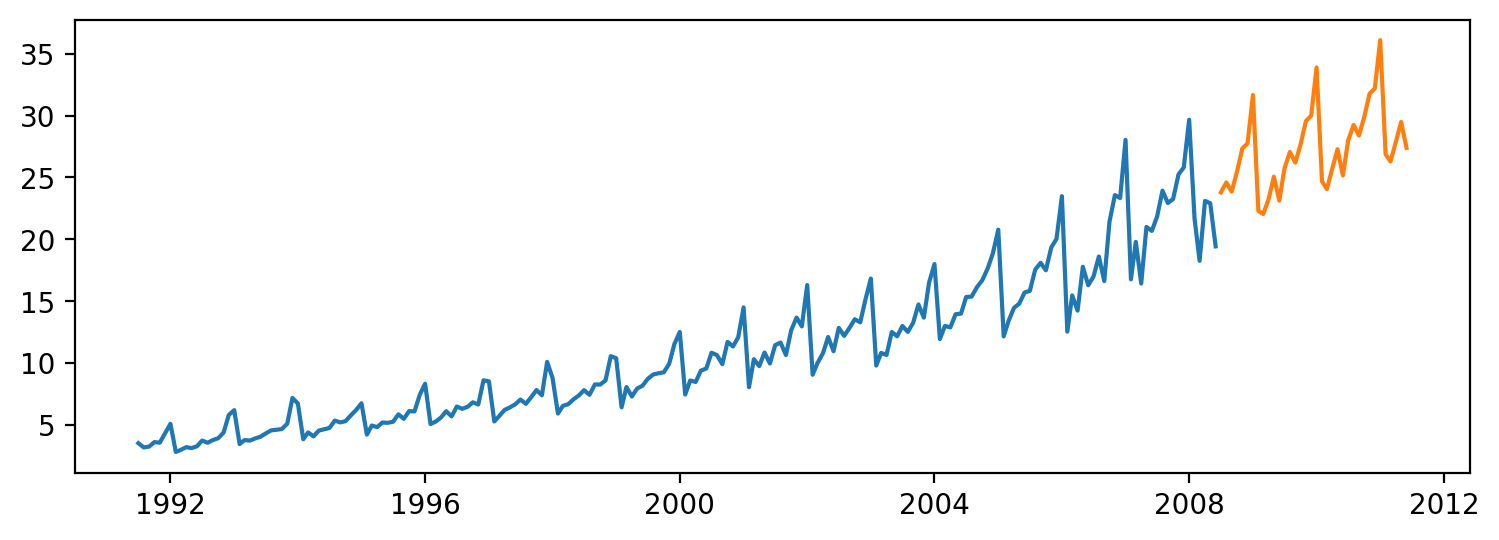

In [60]:
plt.figure(dpi=200)
# Plot prediction
plt.plot(time_series, label='actual')
plt.plot(fc, label='forecast')

# Shade uncertainty area
#plt.fill_between(dates, lower_limits, upper_limits, color='pink')
plt.show()